In [135]:
import numpy as np

In [136]:
def random_point_nearby_line(weight,bias,size):
    x_point = np.linspace(-1,1,size)[:,np.newaxis]
    noise = np.random.normal(0,0.5,x_point.shape)
    y_point = weight*x_point+bias+noise
    input_arr = np.hstack((x_point,y_point))
    return input_arr

In [137]:
weight = 1;bias=3;size=100

In [138]:
input_point = random_point_nearby_line(weight,bias,size)

In [139]:
# 给数据打标签
label = np.sign(input_point[:,1]-(input_point[:,0]*weight+bias)).reshape((size,1))

In [140]:
import matplotlib.pyplot as plt

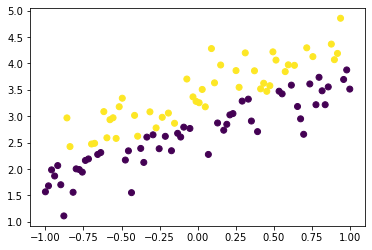

In [141]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# for i in range(label.size):
#     if label[i] == 1:
#         ax.scatter(input_point[i,0],input_point[i,1],color='r');
#     else:
#         ax.scatter(input_point[i,0],input_point[i,1],color='b');
ax.scatter(input_point[:,0],input_point[:,1],c=label);

In [142]:
# 随机梯度下降
weight = np.random.randn(2,1)
bias = 0
def traingradientdescent(input_point,label,train_num=100,lr = 1):
    global weight,bias
    x = input_point
    y = label
    for rounds in range(train_num):
        count = 0
        for i in range(len(input_point)):
            x1,x2 = x[i]
            prediction = np.sign(weight[0]*x1+weight[1]*x2+bias)
            if y[i]*prediction <= 0: # 误分类点
                weight[0] = weight[0]+lr*y[i]*x1
                weight[1] = weight[1]+lr*y[i]*x2
                bias = bias+lr*y[i]
                if y[i]*np.sign(weight[0]*x1+weight[1]*x2+bias)>0:
                    count +=1
            else:
                count +=1
        if rounds %10 ==0:
            lr *= 0.9
            accuracy = count/len(input_point)
            print('rounds {},accuracy {}'.format(rounds,accuracy))